- Unstructred data will accont for more than 80% of the data collected by organizations.
- Data has classified in  to three types
    - Structred - csv, excel
    - Unstructured - Videos, textdata, audio files
    - Semi Structured - twitter data with text column will be considered as unstructured and date column are considered as structured.
- Sources of Text data
    - Social Media platforms ( Twitter, Facebook, Whatsapp)
    - Documents (Memos, research papers, articles)
    - Email Conversations (helps to know which is the most frequenty used words which helps for apprisal review)
    - Web Pages
    - SMS ( SMS classified as Transactional and Personal and Spam which helps in navigating) - 
    - Transcripts
- Human Vs Machines
    - Humans can understand numbers, text, images where as machine understand only numbers.
    - Humans can understand regional language where as machine dont.
    
- Poor Data Quality:
    - Most text data are generated by humans - Prone to data entry.
    - Text data contains abbrevations, short forms, poor grammar.
    - Mix of language - Regional language typed with alphabets.
    - Casual language - Fillers, Idioms etc
    - Encoding isses when applications load text files.
- High dimmensional Data:
    - Conversion to structured data creates high dimmension data.
    - Requires high end machines for the understanding of the data.
- Text Mining Techniques:
    - Sentiment Analysis (Customer Feedback & Emotion)
    - Categorization (Redirect complaints to concerned department)
    - Feature Extraction
    - Text Summarization ( One line news description )
    - Natural Language Processing ( CHatbots, Personal Assistant )
- Text Mining Process
    - Data Sources -- Data Extraction -- Build Corpus & Text Cleaning -- Feature Extraction -- Text Analytics --Visualize/Report



In [112]:
import pandas as pd
import numpy as np
import nltk

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

In [3]:
!pip install wordcloud

You are using pip version 18.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [114]:
imdb = pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/imdb_sentiment.csv')

In [115]:
imdb.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [116]:
imdb['sentiment'].value_counts()

1    386
0    362
Name: sentiment, dtype: int64

# BAG OF WORDS ANALYSIS
- Taking the raw text data and convert that into Document Term Matrix 
- Later we find the rank/frequency of the words and make a table of them.
- Then we can visualize them by using wordcloud.
( trying to identify words in the data(term) 
    - if the term has one word it is unigram
    - if the term has two word it is bigram
    - if the term has three word it is trigram)

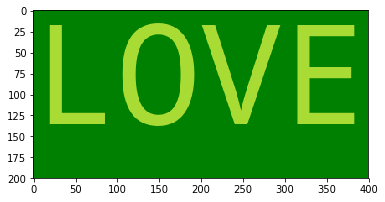

In [126]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color = "Green").generate('I LOVE YOU')
plt.imshow(wc)

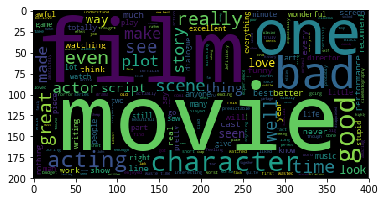

In [127]:
input_string = ' '.join(imdb['review'])
wc = WordCloud(background_color = "Black").generate(input_string)
plt.imshow(wc)

# Text Cleaning
 - Convert every character to lower case.
 - Remove junk characters.
 - Removing the commonly used words.
 - Identify the root of the words - Stemming and lemmatization is the process name (eg: play, played, playing, plays as 'PLAY')

In [130]:
docs = imdb['review'].str.lower().str.replace('[^a-z ]', '')

In [131]:
for doc in docs.head(1):
    print(doc)

a very very very slowmoving aimless movie about a distressed drifting young man  


In [10]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords[:5]

['i', 'me', 'my', 'myself', 'we']

In [11]:
stemmer = nltk.stem.PorterStemmer()
stemmer.stem('plays')

'play'

In [12]:
docs_clean = []
for doc in docs.head(2):
    words = doc.split(' ')
    #print(doc)
    #print(words)
    words_clean =[]
    for word in words:
        if word not in stopwords:
            words_clean.append(stemmer.stem(word))
    
    doc_clean = ' '.join(words_clean)
    docs_clean.append(doc_clean)
    print(docs_clean)
    #print(words_clean)
    print('-------------------------')

['slowmov aimless movi distress drift young man  ']
-------------------------
['slowmov aimless movi distress drift young man  ', 'sure lost  flat charact audienc nearli half walk  ']
-------------------------


In [132]:
docs = imdb['review'].str.lower().str.replace('[^a-z ]', '')

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return " ".join(words_clean)
docs_clean = docs.apply(clean_sentence)

# Sparsity
- 5 rows * 5 columns
- sparsity = no of zeroes/(no of rows * columns)
- High dimension data
- every column is a vector representation of a term 

# Document term matrix

In [133]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(docs_clean)
dtm = vectorizer.transform(docs_clean)
dtm

<748x2475 sparse matrix of type '<class 'numpy.int64'>'
	with 6797 stored elements in Compressed Sparse Row format>

In [134]:
docs_clean.shape

(748,)

In [135]:
no_of_zeroes = (748*2475) - 6797
sparsity = no_of_zeroes / (748*2475) * 100 
sparsity

99.63285259007183

In [136]:
df_dtm = pd.DataFrame(dtm.toarray(),columns = vectorizer.get_feature_names())
df_dtm

,aailiyah,abandon,abil,abroad,absolut,abstrus,abysm,academi,accent,access,...,younger,your,youth,youtub,youv,yun,zillion,zombi,zombiestud,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
(df_dtm ==0).sum().sum()

1844503

In [35]:
(748*2475) - 1844503

6797

In [137]:
df_dtm.sum().sort_values(ascending=False).head(20)

movi       207
film       184
one         79
bad         67
like        59
charact     58
good        56
time        49
watch       48
act         46
see         43
great       41
realli      41
even        39
love        37
make        33
scene       33
stori       32
well        31
look        29
dtype: int64

In [138]:
df_dtm.sum(axis=1).sort_values(ascending=False).head(20)

136    686
19     425
646    408
149    131
135    107
422     41
192     37
223     34
271     31
230     29
278     28
423     28
606     27
177     26
605     25
474     24
465     24
194     23
562     23
237     23
dtype: int64

In [141]:
from sklearn.model_selection import train_test_split
train_x,test_x  = train_test_split(df_dtm,test_size=0.2,random_state=100)

In [145]:
imdb.iloc[train_x.index]['sentiment']

161    1
104    0
308    0
467    0
3      0
471    0
564    1
661    0
388    0
189    1
44     0
235    0
400    0
31     0
654    0
668    0
644    1
656    0
539    0
307    0
425    1
563    1
46     0
376    0
365    0
163    1
545    1
147    1
664    1
269    1
      ..
695    1
317    0
705    1
431    1
49     1
135    1
603    0
4      1
612    1
723    1
141    1
415    1
667    0
386    0
86     0
93     0
649    0
507    0
570    1
316    0
228    0
655    0
280    0
526    0
738    1
578    0
53     0
350    1
79     0
520    0
Name: sentiment, Length: 598, dtype: int64

In [140]:
train_y  = imdb.iloc[train_x.index]['sentiment']
test_y = imdb.iloc[test_x.index]['sentiment']

In [146]:
from sklearn.ensemble import RandomForestClassifier
rf_model =RandomForestClassifier(random_state=100)
rf_model.fit(train_x,train_y)
rf_predict_class = rf_model.predict(test_x)
from sklearn.metrics import accuracy_score
accuracy_score(test_y,rf_predict_class)

0.6733333333333333

In [147]:
hotstar = pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/hotstar.allreviews_Sentiments.csv')

In [148]:
hotstar.head()

,ID,UserName,Created_Date,Reviews,Lower_Case_Reviews,Sentiment_Manual_BP,Sentiment_Manual,Review_Length,DataSource,Year,Month,Date,Sentiment_Polarity
0,1,NaN,8/10/2017,Hh,hh,Negative,Negative,2,Google_PlayStore,2017,8,10,Neutral
1,2,NaN,8/11/2017,No,no,Negative,Negative,2,Google_PlayStore,2017,8,11,Neutral
2,3,asadynwa,8/12/2017,@hotstar_helps during paymnt for premium subsc...,@hotstar_helps during paymnt for premium subsc...,Help,Negative,140,Twitter,2017,8,12,Negative
3,4,jineshroxx,8/11/2017,@hotstartweets I am currently on Jio network a...,@hotstartweets i am currently on jio network a...,Help,Negative,140,Twitter,2017,8,11,Positive
4,5,YaminiSachar,8/5/2017,@hotstartweets the episodes of Sarabhai vs Sar...,@hotstartweets the episodes of sarabhai vs sar...,Help,Negative,140,Twitter,2017,8,5,Neutral


In [149]:
docs = hotstar['Reviews'].str.lower().str.replace('[^a-z ]', '')

In [150]:
def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return " ".join(words_clean)
docs_clean = docs.apply(clean_sentence)

In [151]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(docs_clean)
dtm = vectorizer.transform(docs_clean)
dtm

<5053x6145 sparse matrix of type '<class 'numpy.int64'>'
	with 37273 stored elements in Compressed Sparse Row format>

In [152]:
df_dtm = pd.DataFrame(dtm.toarray(),columns = vectorizer.get_feature_names())
df_dtm

,aa,aaaaaand,aaaaah,aab,aabe,aacikelqcgv,aadat,aadhaar,aadhaarmem,aadhitamizhan,...,zeemoham,zeetv,zero,zinab,zindabad,ziuoubngwejxo,zmilap,znmd,zombi,zzzune
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
from sklearn.model_selection import train_test_split
train_x,test_x  = train_test_split(df_dtm,test_size=0.2,random_state=100)

In [154]:
train_y  = hotstar.iloc[train_x.index]['Sentiment_Manual']
test_y = hotstar.iloc[test_x.index]['Sentiment_Manual']

In [155]:
from sklearn.ensemble import RandomForestClassifier
rf_model =RandomForestClassifier(random_state=100)
rf_model.fit(train_x,train_y)
rf_predict_class = rf_model.predict(test_x)
from sklearn.metrics import accuracy_score
accuracy_score(test_y,rf_predict_class)

0.7101879327398615

In [156]:
from sklearn.naive_bayes import MultinomialNB
clf_cv=MultinomialNB()
clf_cv.fit(train_x,train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [159]:
ypred_cv = clf_cv.predict(test_x)

In [160]:
print(accuracy_score(test_y,ypred_cv))

0.7359050445103857


# TF-IDF Vectorization

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
train,test = train_test_split(docs_clean,test_size=0.2,random_state=100)
tfidf =TfidfVectorizer()
tfidf.fit(train)
train_dtm_tfidf = tfidf.transform(train)
test_dtm_tfidf =tfidf.transform(test)

df_train_tfidf = pd.DataFrame(train_dtm_tfidf.toarray(),columns=tfidf.get_feature_names())

df_test_tfidf = pd.DataFrame(test_dtm_tfidf.toarray(),columns=tfidf.get_feature_names())

train_y = imdb.iloc[df_train_tfidf.index]['sentiment']
test_y =imdb.iloc[df_test_tfidf.index]['sentiment']

In [111]:
from sklearn.ensemble import RandomForestClassifier
rf_model =RandomForestClassifier(random_state=100,n_estimators=300)
rf_model.fit(df_train_tfidf,train_y)
rf_predict_class = rf_model.predict(df_test_tfidf)
from sklearn.metrics import accuracy_score
accuracy_score(test_y,rf_predict_class)

0.4866666666666667